In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from albumentations import *
from albumentations.pytorch import ToTensor
from torch.utils.data import Dataset, DataLoader, random_split
import os
from PIL import Image
from glob import glob
import cv2        
import copy
%matplotlib inline      

In [3]:
import requests
url = 'http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz'
filename = url.split('/')[-1]
with open(filename, 'wb')as f:
    r = requests.get(url)
    f.write(r.content)

In [6]:
!tar -xvzf CUB_200_2011.tgz

x attributes.txt
x CUB_200_2011/
x CUB_200_2011/images/
x CUB_200_2011/images/001.Black_footed_Albatross/
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0032_796115.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0057_796106.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0036_796127.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0060_796076.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0019_796104.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0069_796139.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0089_796069.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0071_796113.jpg
x CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0077_796114.jpg
x CUB_200_2011

x CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0007_796372.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0044_1731.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0018_1613.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0007_1615.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0051_1650.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0058_1751.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0090_1567.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0071_1559.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0004_1528.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0032_1776.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0072_1696.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0012_1784.jpg
x CUB_200_2011/images/004.Groove_billed_Ani/G

x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0084_28318.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0136_28918.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0046_28391.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0053_28445.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0124_28966.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0045_28805.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0131_28962.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0104_28371.jpg
x CUB_200_2011/images/036.Northern_Flicker/Northern_Flicker_0022_28952.jpg
x CUB_200_2011/images/037.Acadian_Flycatcher/
x CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0063_795585.jpg
x CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0004_795623.jpg
x CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0055_795609.jpg
x CUB_200_2011/images/037.Acadian_Flyca

x CUB_200_2011/images/059.California_Gull/California_Gull_0012_41272.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0114_41267.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0100_41088.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0006_41079.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0021_41471.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0096_40978.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0066_41188.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0121_41196.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0092_41300.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0019_41377.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0105_41116.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0029_41506.jpg
x CUB_200_2011/images/059.California_Gull/California_Gull_0076_40788.jpg
x CUB_200_2011/images/059.California_Gull/Californi

x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0004_49019.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0088_49177.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0010_49169.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0086_49532.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0014_48983.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0108_49356.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0007_49364.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0093_49052.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0110_49408.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0077_49051.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0085_49456.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0101_49790.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0064_49406.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0094_49347.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0062_49722.jpg
x CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0050_49

x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0126_90319.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0049_89955.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0055_90850.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0070_90221.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0125_90382.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0115_90442.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0060_90879.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0124_90350.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0068_90397.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0043_90499.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0067_90416.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0013_90445.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0118_90049.jpg
x CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0076_90895.jpg
x CUB_200_2011/images/096.Hooded_O

x CUB_200_2011/images/099.Ovenbird/Ovenbird_0004_92868.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0137_92639.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0032_93199.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0034_93006.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0128_93366.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0122_92993.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0131_92559.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0048_92876.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0019_92699.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0126_92602.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0058_93078.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0108_92675.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0089_93234.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0099_93148.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0070_93140.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0020_93049.jpg
x CUB_200_2011/images/099.Ovenbird/Ovenbird_0009_93395.j

x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0067_136244.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0058_134987.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0087_137354.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0071_136749.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0046_135770.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0108_135068.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0105_134648.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0002_136792.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0111_135253.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0103_137272.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0030_134942.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0127_135912.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0056_135079.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0092_136236.jpg
x CUB_200_2011/images/138.Tree_Swallow/Tree_Swal

x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0046_139802.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0066_140621.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0025_139320.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0088_139473.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0010_139948.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0125_139399.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0111_139605.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0095_139882.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0030_139210.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0101_139441.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0117_140812.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0075_139858.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0062_140633.jpg
x CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0080_140

x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0071_165342.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0027_795917.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0066_165290.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0082_795869.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0076_795907.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0021_165230.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0043_165240.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0065_795899.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0022_795882.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0012_795875.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0019_165389.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0002_795886.jpg
x CUB_200_2011/images/168.Kentucky_Warbler/Kentucky_Warbler_0030_795885.jpg
x CUB_200_20

x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0026_166680.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0072_166702.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0089_166896.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0104_166829.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0073_166798.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0107_166917.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0102_166725.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0009_166752.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0067_166828.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0069_166914.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0015_166713.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0050_166820.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0043_166708.jpg
x CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0103_166

x CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0015_188852.jpg
x CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0147_188367.jpg
x CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0106_188100.jpg
x CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0069_188776.jpg
x CUB_200_2011/images/198.Rock_Wren/
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0024_188942.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0021_189175.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0080_189340.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0009_189162.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0033_189397.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0043_188933.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0004_189046.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0086_188944.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0059_188941.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0123_189405.jpg
x CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0114_189283.jpg
x CUB_200_2011/images/198

x CUB_200_2011/attributes/class_attribute_labels_continuous.txt
x CUB_200_2011/parts/
x CUB_200_2011/parts/part_locs.txt
x CUB_200_2011/parts/part_click_locs.txt
x CUB_200_2011/parts/parts.txt
x CUB_200_2011/images.txt
x CUB_200_2011/train_test_split.txt
x CUB_200_2011/classes.txt
x CUB_200_2011/image_class_labels.txt
x CUB_200_2011/bounding_boxes.txt
x CUB_200_2011/README


In [2]:
path = os.path.join(os.environ["HOMEPATH"], 'Desktop', 'DL_projects', 'bird_classifier')
img_path = os.path.join(path, 'CUB_200_2011', 'images')

In [156]:
bird_files = np.array(glob(img_path + "/*/*"))

# Albumentations and Pytorch

In [44]:
bird_files[3].split('\\')[8]

'001.Black_footed_Albatross'

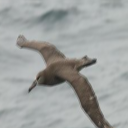

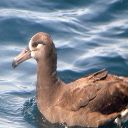

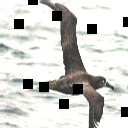

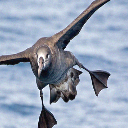

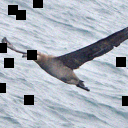

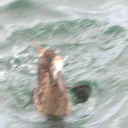

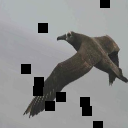

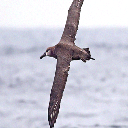

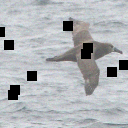

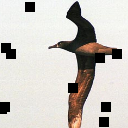

In [163]:
for i in range(10):
    img = Image.open(bird_files[i])
    augmented = aug_train(image=np.array(img))
    img = Image.fromarray(augmented['image'])
    display(img)

In [159]:
aug_train = Compose([
        Rotate(limit=60),
        Resize(180, 180),
        CenterCrop(156, 156),
        RandomCrop(128, 128),
        HorizontalFlip(),
        GaussNoise(),
        MotionBlur(p=.3),
        RandomBrightnessContrast(),
        Cutout(num_holes=10, max_h_size=10, max_w_size=10)
    ])

In [107]:
aug = Compose([
        Resize(128, 128),
        Normalize(),
        ToTensor()
])

In [164]:
class bird_data(Dataset):
    def __init__(self, paths, transform=None):
        self.paths = paths
        self.labels, self.classes = self._get_label_class(self.paths)
        self.transform = transform
    def _get_label_class(self, paths):
        labels = []
        classes = [None]*200
        for i in range(len(paths)):
            lbl, cls = paths[i].split('\\')[8].split('.')
            labels.append(int(lbl)-1)
            classes[int(lbl)-1] = cls
        return labels, classes
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, i):
        label = self.labels[i]
        path = self.paths[i]
        image = cv2.imread(path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

In [165]:
image = cv2.imread(bird_files[1])
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = aug(image=image)['image']
image.shape

torch.Size([3, 128, 128])

In [166]:
bs=32
dataset = bird_data(paths=bird_files, transform=aug)

In [167]:
classes = dataset.classes
print(classes[:20])
print(len(classes))

['Black_footed_Albatross', 'Laysan_Albatross', 'Sooty_Albatross', 'Groove_billed_Ani', 'Crested_Auklet', 'Least_Auklet', 'Parakeet_Auklet', 'Rhinoceros_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Rusty_Blackbird', 'Yellow_headed_Blackbird', 'Bobolink', 'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Cardinal', 'Spotted_Catbird', 'Gray_Catbird', 'Yellow_breasted_Chat']
200


In [168]:
num_data = len(bird_files)
train_size = int(0.8*num_data)
val_size = int(0.1*num_data)
test_size = int(num_data-train_size-val_size)
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

In [169]:
train_ds.dataset = copy.copy(dataset)
train_ds.dataset.transform = Compose([
        Rotate(limit=60),
        Resize(180, 180),
        CenterCrop(156, 156),
        RandomCrop(128, 128),
        HorizontalFlip(),
        GaussNoise(),
        MotionBlur(p=.3),
        RandomBrightnessContrast(),
        Cutout(num_holes=10, max_h_size=10, max_w_size=10),
        Normalize(),
        ToTensor()
    ])

In [170]:
print(len(train_ds), len(test_ds))

9430 1180


In [171]:
train_loader = DataLoader(train_ds,batch_size=bs, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=bs, shuffle=True)


In [172]:
def show_batch(loader):
    images, labels = next(iter(loader))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    fig = plt.figure(figsize=(25,8))
    for idx in np.arange(32):
        image = images[idx].numpy().transpose(1,2,0)
        image = std * image + mean
        image = np.clip(image, 0, 1)
        ax = fig.add_subplot(4,8, idx+1, xticks=[], yticks=[])
        plt.imshow(image)
        ax.set_title(dataset.classes[labels[idx]])

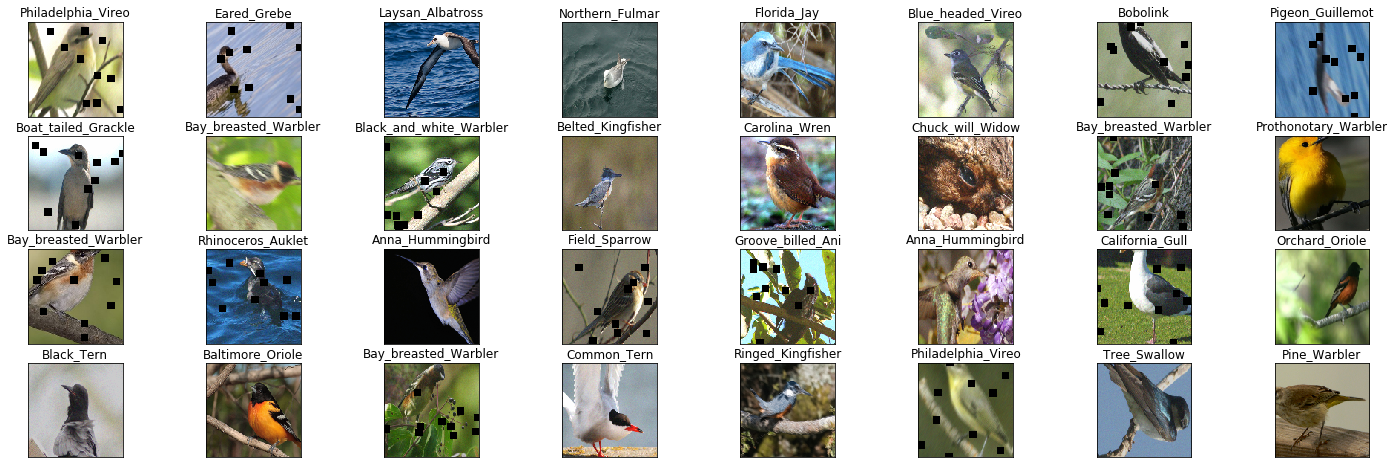

In [173]:
show_batch(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()

In [3]:
resnet50 = models.resnet50(pretrained=True)
resnet50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\yuuha/.cache\torch\checkpoints\resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
for param in resnet50.parameters():
    param.require_grad = False

In [7]:
inp = resnet50.fc.in_features
fc = nn.Linear(inp, 200)
resnet50.fc = fc
if use_cuda:
    resnet50.cuda()

In [8]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters())

In [ ]:
def fit(n_epochs, model, train_loader, valid_loader, criterion, optimizer, use_cuda, model_path):
    valid_loss_min = np.Inf
    for epoch in range(1, n_epochs+1):
        train_loss=0.
        valid_loss=0.
        correct=0
        model.train()
        for batch_idx, (image, label) in enumerate(train_loader):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + (1/(batch_idx+1)) * (loss.data-train_loss)
            
        model.eval()
        for batch_idx, (image, label) in enumerate(valid_loader):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            output = model(image)
            loss = criterion(output, label)
            valid_loss = valid_loss + (1/(batch_idx+1)) * (loss.data-valid_loss)
            pred = torch.max(output.data, 1)
            correct += (output==label).sum()
        accuracy = 100 * correct / len(valid_loader)
        print(f'Epoch: {epoch}   Training Loss: {train_loss:.5f}   Valid Loss: {valid_loss:.5f}  Accuracy: {accuracy:.5f}')
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), model_path)
            valid_loss_min = valid_loss
    return model

In [ ]:
model_alb_pyt = fit(30, train_loader, valid_loader, criterion, optimizer, use_cuda, 'res50_alb_pyt.pt')


# Fastai

In [13]:
from fastai import *
from fastai.vision import *

ImportError: cannot import name 'master_bar' from 'fastprogress' (C:\Users\yuuha\Anaconda3\envs\projects\lib\site-packages\fastprogress\__init__.py)